In [0]:
# You are going to need to run this cell, restart the runtime after running this command,
# then start over before you can run the code in this notebook.
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.2.0/en_core_web_md-2.2.0.tar.gz

     |████████████████████████████████| 96.4MB 55kB/s 
     |████████████████████████████████| 10.4MB 2.9MB/s 
     |████████████████████████████████| 3.7MB 36.5MB/s 
     |████████████████████████████████| 122kB 51.5MB/s 
     |████████████████████████████████| 2.2MB 38.3MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.0-cp36-none-any.whl size=98072934 sha256=589d8d17460481a17c09a7ce9801ec9dac4cda029c9f06ba6ad712700fe085ec
  Stored in directory: /root/.cache/pip/wheels/5f/3e/c9/36dd6e13b449fd84cd1f94b72dfbc559daf09f53dbf4e697a3
Successfully built en-core-web-md
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uninstalled blis-0.2.4
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: spacy 2.1.9
    Uninstalling

In [0]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1dAHDZe4PJLEcPmTGfnL2EOhjgq0vUsts' -O twitter.csv

--2020-02-29 18:41:52--  https://drive.google.com/uc?export=download&id=1dAHDZe4PJLEcPmTGfnL2EOhjgq0vUsts
Resolving drive.google.com (drive.google.com)... 173.194.216.113, 173.194.216.138, 173.194.216.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6l4bu10pr85ock2kn8hed26r3b1jtsq2/1583001675000/04648667956580575220/*/1dAHDZe4PJLEcPmTGfnL2EOhjgq0vUsts?e=download [following]
--2020-02-29 18:41:53--  https://doc-0s-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6l4bu10pr85ock2kn8hed26r3b1jtsq2/1583001675000/04648667956580575220/*/1dAHDZe4PJLEcPmTGfnL2EOhjgq0vUsts?e=download
Resolving doc-0s-7s-docs.googleusercontent.com (doc-0s-7s-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0s-7s-docs.googleusercontent.com (d

In [0]:
import pandas as pd
input_file = pd.read_csv("twitter.csv")
print(input_file.shape)

(200, 3)


# Sentiment Analysis on Twitter Posts

I have developed an annotation manual with Isabel, a friend who took the same machine learning class with me. Under the guidance of the manual, Isabel and I annotated 200 microblog posts seperately. Therefore, there're two columns of labels for each post in the dataset.

And you should know the approximate upper bound of machine learning performance on this data, equal to your inter-rater reliability.

Save your work to a CSV file with the two annotator's labels (name the columns `labels_A` and `labels_B`), and a third column with the original text of the annotated post. 

# Task 1
Divide your data into a training set and a test set made up of 20% of the data. If you have 200 rows, your training set should have 160 examples, and your test set should have 40 rows.

In [0]:
# Install textstat
!pip install textstat

     |████████████████████████████████| 3.0MB 4.3MB/s 


In [0]:
# Libary Import
import math
# import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import dates
from datetime import datetime
import re
import calendar
import json

from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB 
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import spacy
from spacy.lang.en import English

# import jieba
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning

import textstat

In [0]:
# Solution to Task 1 here.

# Construct test set
# Randomly select 160 observations from the dataframe 
train_df = input_file.sample(n=160,random_state=123).reset_index()

# Construct test set
test_df = input_file.merge(train_df, on=['text'],how='left', indicator=True)
test_df = test_df[test_df['_merge']=='left_only'][['labels_A_x','labels_B_x','text']].reset_index()
test_df = test_df.rename(columns={'labels_A_x':'labels_A','labels_B_x':'labels_B'})

# Task 2

Use 10-fold cross-validation on your training set. Each fold should contain 8% of the original training data (if you had 200 rows originally and use an 80% training set, each fold for optimization will contain 16 examples). 

Optimize a machine learning classifier predicting `labels_A`, using features you extract from the microblog texts. 

Choose and perform **THREE** of the following optimizations:

   - Compare Naïve Bayes, Logistic Regression, and SVMs on a unigram feature space.
   - Compare a unigram feature space with a feature space that also includes longer N-grams.
   - Compare a unigram feature space with a feature space that removes stopwords.
   - Vary the vocabulary size of your n-gram feature space and evaluate how performance changes.
   - If you are working with English data, additional options include:
      - Compare an n-gram feature space with a feature space that also includes part-of-speech n-grams.
      - Compare an n-gram feature space to a word embedding feature space.
      - Compare a standard n-gram feature space with a lemmatized feature space.
   - For the one most accurate model so far, tune your hyperparameters.
       - For Naive Bayes, evaluate different implementations: ComplementNB, MultinomialNB, BernoulliNB
       - For Support Vector Machines, evaluate different kernels including a polynomial kernel and a radial basis function kernel.
       - For Logistic Regression, try L1 and L2 regularization, as well as unregularized features.

Report the performance of your best-tuned model on the cross-validated training set.


## 1. Classifer Comparison Function
Define the function to compare classifier based on the quality metrics.

In [0]:
# Set a list of metrics we want to use to compare our classifiers 
metrics = {
    "Accuracy" : lambda y,y_pred: 100*accuracy_score(y,y_pred),
    "Kappa"    : cohen_kappa_score
}

# Set a list of labels
sorted_sentiments = ['positive','negative','neutural']

"""
Options for noisy: "loud", "quiet", and other. Any other value prints nothing (silent).
"""

# Start by defining a function to evaluate a classifier's predictions
def evaluate(y_pred, y_actual, metrics, model_name = 'model'):
    # Compute Confusion Matrix
    conf_matrix = confusion_matrix(y_actual, y_pred)

    # Compute and store each metric
    model_metrics = {}
    for (metric_name, metric) in metrics.items():
        result = metric(y_actual, y_pred)
        model_metrics[metric_name] = result

    return conf_matrix, model_metrics


# Then define a function that trains a classifier and evaluates it on one fold
def evaluate_one_fold(classifier_name, classifier, X_train, y_train, X_test, y_test, metrics, fold_num, noisy = 'loud', labels=[]):

    # Train and Evaluate Model
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix, model_metrics = evaluate(y_pred, y_test, metrics, model_name = classifier_name)

    # Display Results appropriately when noisy is set to 'loud' or 'quiet'
    if noisy == 'quiet' and fold_num == 0:
        print(f"{classifier_name}: Fold {fold_num}", end = '')
    elif noisy == 'quiet':
        print(f'...{fold_num}', end ='')
    elif noisy == 'loud':
        print(f"{classifier_name}: Fold {fold_num} Results")
        ConfusionMatrixDisplay(conf_matrix, labels).plot(values_format='.4g')
        plt.show()
        print(model_metrics)
        print("------------------------")

    return model_metrics



# Then define a function to evaluate over all folds
def evaluate_all_folds(classifier_name, classifier, X, y, kf, metrics, noisy = 'loud', labels=[]):

    # Initialize tracking variables
    all_fold_metrics = {metric_name: [] for metric_name in metrics}

    # Iterate over each fold
    for fold_num, (train_index, test_index) in enumerate(kf.split(X, y)):
        # Get the data subset for the current fold
        
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]

        # Train and Evaluate the Model
        model_metrics =  evaluate_one_fold(classifier_name, classifier, X_train, y_train, X_test, y_test, metrics, fold_num, noisy, labels=labels)

        # Update our tracking variables
        [all_fold_metrics[metric_name].append(metric_val) for metric_name, metric_val in model_metrics.items()]

    return all_fold_metrics


    
def compare_classifiers(classifiers, metrics,  df, feature_set,
                        target, folds = 10, shuffle = True, noisy='loud', labels=[]):


    # Set up dataset and cross validation
    X = df.loc[:, feature_set]
    X = pd.get_dummies(X)
    y = df[target]
    kf = StratifiedKFold(n_splits=folds, shuffle=shuffle)

    # Initialize tracking variables for metrics
    best_by_metrics = {}

    # For each quality metrics
    for metric_to_optimize in metrics.keys():
      best = 0
      best_name = None
      classifier_comparison = {} 

      # For each classifier
      for classifier_name, classifier in classifiers.items():
        # Initialize tracking variables
       
        # Evaluate on all metrics for all folds
        all_fold_metrics = evaluate_all_folds(classifier_name, classifier, X, y, kf, metrics, noisy = noisy, labels=labels)
        
        # Compute average performance on metric to optimize over
        optimization_metric_avg = np.mean(all_fold_metrics[metric_to_optimize])


        # Update Tracking Variables
        if optimization_metric_avg > best:
            best = optimization_metric_avg
            best_name = classifier_name           
        classifier_comparison[classifier_name] = all_fold_metrics
     
        if noisy == 'quiet': 
            print()
            print(f"Average {metric_to_optimize}: {optimization_metric_avg:.3f}")
            print('-------------')

      best_by_metrics[metric_to_optimize] = {best_name:best}    
    # Return our results
    return best_by_metrics, classifier_comparison




## 2. Classifers Comparison between NB, LR, and SVM


### 2.1. Dataset of Unigram Construction
Use **Bag of Words** to get a dataframe of unigram features

In [0]:
# Solution to Task 2 here.

vocab_size = 1000

# By default we can build a unigram model - capturing individual words only
vectorizer = CountVectorizer(max_features=vocab_size)
X = vectorizer.fit_transform(train_df['text'])

In [0]:
# construct a DataFrame with our BOW model representations for each message
bow_df = pd.DataFrame(X.toarray())
column_names = [str(i) for i in range(vocab_size)]

# Make the column names the words
for k, v in vectorizer.vocabulary_.items():
  column_names[v] = k
bow_df.columns = column_names

# Add sentiment labels to the DataFrame
bow_df["sentiment"] = train_df['labels_A'].values
# Take a look at our DataFrame
bow_df

,007,04uexsbx2q,06oilp9tr1,0oa7vj6c4p,10,100th,10am,10th,11,11am,11th,12th,13th,14th,15,16,17th,18c,1pkyxlonpy,1st,200,2006,2015,2016,20th,24,2itskwfeoq,2nd,2ndcityhockey,30,35595,3rd,40th,4th,500,589,5sgsogegkt,5th,60s,6th,...,who,why,will,win,wins,wish,with,without,woke,woman,work,worst,woul,would,wow,wrestling,wright,wrong,wwenetwork,xnsm1nzagg,xyoivjkznt,yagottabelieve,yakub,yankees,yatessavannah,yay,year,yes,yet,ymdslb2lut,yoga,you,your,yr,ysiy046omy,zac,zayn,zeebo_90,zickzrkqn8,sentiment
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,neutral
156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,neutral
158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative


### 2.2. Comparing and Result


In [0]:
# Pick Classifiers to Compare
classifiers1 = {
    "Complement NB": ComplementNB(), 
    "Logistic Regression": LogisticRegression(random_state=123),
    "Linear SVM": LinearSVC(random_state=123)
}

# Pick features to use
bow_features = column_names
feature_set = bow_features

# Compare models and display final result
best_by_metrics, classifier_comparison = compare_classifiers(classifiers1, metrics,  bow_df, feature_set, 'sentiment', labels=sorted_sentiments, noisy = 'quiet',)

for metrics_name, classifier in best_by_metrics.items():
  print(f"Based on the {metrics_name} of {list(classifier.values())[0]:.2f}, best classifier is: {list(classifier.keys())[0]}.")    


Complement NB: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 50.000
-------------
Logistic Regression: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 64.375
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 69.375
-------------
Complement NB: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.141
-------------
Logistic Regression: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: -0.003
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.107
-------------
Based on the Accuracy of 69.38, best classifier is: Linear SVM.
Based on the Kappa of 0.14, best classifier is: Complement NB.


**Conclusion**

In the first question, we find out that the support vector machine works best. Therefore, in the second question, I will compare the models with different number of grams based on the support vector machine Algorithm.

## 3. Comparison between Unigrams and N-grams



### 3.1. Three Datasets Construction
Three different Datasets are needed constructing with the features of unigram, bigram and trigram.

In [0]:
# Create a vocab of n-grams from the dataframe
def ngrams(df, vocab_size = 1000, max_n=1):
  vectorizer2 = CountVectorizer(max_features=vocab_size, ngram_range=(1,max_n))
  X2 = vectorizer2.fit_transform(df["text"])

  bow_df2 = pd.DataFrame(X2.toarray())
  column_names2 = [str(i) for i in range(vocab_size)]
  for k, v in vectorizer2.vocabulary_.items():
    column_names2[v] = k
  bow_df2.columns = column_names2

  bow_df["sentiment"] = df["labels_A"].reset_index()['labels_A']
  return column_names2,bow_df2

# Unigrams DataFrame
unigram_names,unigram_df = ngrams(train_df, max_n=1)
unigram_df["sentiment"] = train_df["labels_A"]
unigram_df

,007,04uexsbx2q,06oilp9tr1,0oa7vj6c4p,10,100th,10am,10th,11,11am,11th,12th,13th,14th,15,16,17th,18c,1pkyxlonpy,1st,200,2006,2015,2016,20th,24,2itskwfeoq,2nd,2ndcityhockey,30,35595,3rd,40th,4th,500,589,5sgsogegkt,5th,60s,6th,...,who,why,will,win,wins,wish,with,without,woke,woman,work,worst,woul,would,wow,wrestling,wright,wrong,wwenetwork,xnsm1nzagg,xyoivjkznt,yagottabelieve,yakub,yankees,yatessavannah,yay,year,yes,yet,ymdslb2lut,yoga,you,your,yr,ysiy046omy,zac,zayn,zeebo_90,zickzrkqn8,sentiment
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,neutral
156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,neutral
158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative


In [0]:
# DataFrame of Bigrams
bigram_names, bigram_df = ngrams(train_df, vocab_size = 3000, max_n=2)
bigram_df["sentiment"] = train_df["labels_A"]
bigram_df

,007,007 spectre,04uexsbx2q,06oilp9tr1,0oa7vj6c4p,10,10 iced,10 minute,10 since,100th,100th episode,10am,10am 11am,10th,11,11 meanwhile,11am,11am and,11th,11th amp,12th,12th caller,12th live,13th,13th title,13th to,14th,14th amendment,15,15 see,16,16 the,17th,17th theopen,18c,18c auspol,1pkyxlonpy,1pkyxlonpy to,1st,1st and,...,you get,you had,you haven,you heard,you him,you know,you might,you peace,you re,you said,you soon,you support,you think,you to,you very,you were,you wish,you would,your,your ass,your concern,your damn,your guessing,your light,your questions,your saturday,your soul,yr,yr as,ysiy046omy,zac,zac brown,zayn,zayn probably,zeebo_90,zeebo_90 is,zickzrkqn8,zlatan,zlatan equalise,sentiment
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative


In [0]:
# DataFrame of Trigrams
trigram_names, trigram_df = ngrams(train_df, vocab_size = 3000, max_n=3)
trigram_df["sentiment"] = train_df["labels_A"]
trigram_df

,007,10,12th,13th,1st,20th,2nd,2nd class,2nd class citizens,30,3rd,4th,6th,7th,about,actually,after,again,against,against the,all,allah,also,amazing,amazon,amp,an,and,and get,and the,and this,angels,are,as,at,at dunkin,at the,back,back to,band,...,you wish,you wish you,you would,you would have,your,your ass,your ass belongs,your concern,your concern for,your damn,your damn straight,your guessing,your guessing derek,your light,your light never,your questions,your questions on,your saturday,your saturday morning,your soul,your soul may,yr,yr as,yr as josh,ysiy046omy,zac,zac brown,zac brown band,zayn,zayn probably,zayn probably think,zeebo_90,zeebo_90 is,zeebo_90 is it,zickzrkqn8,zlatan,zlatan equalise,zlatan equalise on,znuu5ogz7j,sentiment
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative


### 3.2. Comparing and Result

In [0]:
### Setup classifiers and metrics to be used on all n-grams
# Pick Classifiers to Compare
classifiers2 = {
    "Linear SVM": LinearSVC(random_state=123)
}

# Set a list of metrics we want to use to compare our classifiers 
metrics = {
    "Accuracy" : lambda y,y_pred: 100*accuracy_score(y,y_pred),
    "Kappa"    : cohen_kappa_score
}

### Compare classifiers on unigrams ###
best_by_metrics, classifier_comparison = compare_classifiers(classifiers2, metrics, unigram_df, unigram_names, "sentiment", labels=sorted_sentiments, noisy = 'quiet')
for metrics_name, classifier in best_by_metrics.items():
  print(f"The {metrics_name} based on the unigram features is {list(classifier.values())[0]:.2f}, based on the classifier of {list(classifier.keys())[0]}.") 

print()
### Compare classifiers on bigrams ###
best_by_metrics, classifier_comparison = compare_classifiers(classifiers2, metrics,  bigram_df, bigram_names, "sentiment", labels=sorted_sentiments, noisy = 'quiet')
for metrics_name, classifier in best_by_metrics.items():
  print(f"The {metrics_name} based on the bigram features is {list(classifier.values())[0]:.2f}, based on the classifier of {list(classifier.keys())[0]}.") 

print()
### Compare classifiers on trigrams ###
best_by_metrics, classifier_comparison = compare_classifiers(classifiers2, metrics, trigram_df, trigram_names, "sentiment", labels=sorted_sentiments, noisy = 'quiet')
for metrics_name, classifier in best_by_metrics.items():
  print(f"The {metrics_name} based on the trigram features is {list(classifier.values())[0]:.2f}, based on the classifier of {list(classifier.keys())[0]}.") 

Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 65.000
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.064
-------------
The Accuracy based on the unigram features is 65.00, based on the classifier of Linear SVM.
The Kappa based on the unigram features is 0.06, based on the classifier of Linear SVM.

Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 65.625
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.026
-------------
The Accuracy based on the bigram features is 65.62, based on the classifier of Linear SVM.
The Kappa based on the bigram features is 0.03, based on the classifier of Linear SVM.

Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 66.250
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.022
-------------
The Accuracy based on the trigram features is 66.25, based on the classifier of Linear S

**Conclusion**
As the Kappa score indicates, the model based on the unigram dataset works better. I will work on the following questions based on the unigram dataset.

## 4. Comparison between with & without Stopwords


### 4.1. Construction of Dataset without Stopwords

In [0]:
# Extract features for unigrams with no stopwords included.
vectorizer3 = CountVectorizer(max_features=1000, ngram_range=(1,1), stop_words='english')   # Inner List of the stop words, see whether there is imporivement
X3 = vectorizer3.fit_transform(train_df["text"])

no_stopwords_df = pd.DataFrame(X3.toarray())
no_stopwords_columns = [str(i) for i in range(1000)]
for k, v in vectorizer3.vocabulary_.items():
  no_stopwords_columns[v] = k
no_stopwords_df.columns = no_stopwords_columns
no_stopwords_df["sentiment"] = train_df["labels_A"]


### 4.2. Comparing and Result

In [0]:
# Re-run our classifier with stopwords included, as a baseline.
best_by_metrics, classifier_comparison = compare_classifiers(classifiers2, metrics, unigram_df, unigram_names, "sentiment", labels=sorted_sentiments, noisy = 'quiet')
for metrics_name, classifier in best_by_metrics.items():
  print(f"The {metrics_name} based on the dataset with stop words is {list(classifier.values())[0]:.2f}, based on the classifier of {list(classifier.keys())[0]}.") 

print()
# Then run our classifier on the feature space with stopwords removed.
best_by_metrics, classifier_comparison = compare_classifiers(classifiers2, metrics, no_stopwords_df, no_stopwords_columns, "sentiment", labels=sorted_sentiments, noisy = 'quiet')
for metrics_name, classifier in best_by_metrics.items():
  print(f"The {metrics_name} based on the dataset without stop words is {list(classifier.values())[0]:.2f}, based on the classifier of {list(classifier.keys())[0]}.") 


Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 65.625
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.198
-------------
The Accuracy based on the dataset with stop words is 65.62, based on the classifier of Linear SVM.
The Kappa based on the dataset with stop words is 0.20, based on the classifier of Linear SVM.

Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 68.125
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.088
-------------
The Accuracy based on the dataset without stop words is 68.12, based on the classifier of Linear SVM.
The Kappa based on the dataset without stop words is 0.09, based on the classifier of Linear SVM.


**Conclusion**
As the Kappa Score indicates, the model based on the dataset with stop words work better. Therefore, I will keep the stop words in the following questions.

## 5. Comparison Among Different Vocabulary Size


### 5.1 Comparing and Result

In [0]:
metrics_results = {}

# Set a list of word number for the size of the words
sizes_to_test = np.arange(50, 1001, 50).tolist()

for size in sizes_to_test:
  unigram_names, unigram_df = ngrams(train_df, vocab_size = size, max_n=1)
  unigram_df["sentiment"] = train_df["labels_A"]

  best_by_metrics, classifier_comparison = compare_classifiers(classifiers2, metrics, unigram_df, unigram_names, "sentiment", labels=sorted_sentiments, noisy = 'quiet')
  for metrics_name, classifier in best_by_metrics.items():
    print(f"At vocab size {size}, the {metrics_name} is {list(classifier.values())[0]:.2f}, based on the classifier of {list(classifier.keys())[0]}.") 
    if sizes_to_test.index(size) == 0:
      metrics_results[metrics_name] = list()
    metrics_results[metrics_name].append(list(classifier.values())[0])
  print()   


Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 53.125
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.010
-------------
At vocab size 50, the Accuracy is 53.12, based on the classifier of Linear SVM.
At vocab size 50, the Kappa is 0.01, based on the classifier of Linear SVM.

Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 53.750
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: -0.017
-------------
At vocab size 100, the Accuracy is 53.75, based on the classifier of Linear SVM.
At vocab size 100, the Kappa is 0.00, based on the classifier of None.

Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 55.625
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.132
-------------
At vocab size 150, the Accuracy is 55.62, based on the classifier of Linear SVM.
At vocab size 150, the Kappa is 0.13, based on the class

### 5.2 Change Visualization

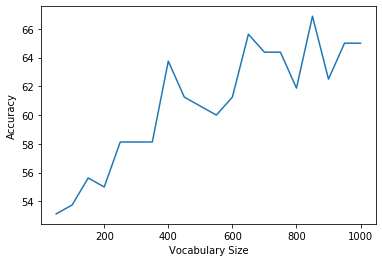

The highest accuracy is based on the model with vocabulary size of 850.


In [0]:
# Use line plot to visulize the Accuracy change
plt.plot(sizes_to_test, metrics_results['Accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Vocabulary Size")
plt.show()
best_size = sizes_to_test[metrics_results['Accuracy'].index(max(metrics_results['Accuracy']))]
print(f'The highest accuracy is based on the model with vocabulary size of {best_size}.')

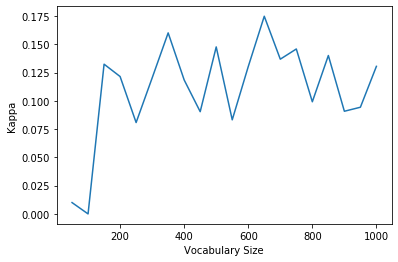

The highest kappa is based on the model with vocabulary size of 650.


In [0]:
# Use line plot to visulize the kappa change
plt.plot(sizes_to_test,metrics_results['Kappa'])
plt.ylabel("Kappa")
plt.xlabel("Vocabulary Size")
plt.show()
best_size = sizes_to_test[metrics_results['Kappa'].index(max(metrics_results['Kappa']))]
print(f'The highest kappa is based on the model with vocabulary size of {best_size}.')

**Conclusion**

As the plot indicates, while setting the word number threshold at the level of 350, the kappa score is highest among all the models of different number of vocabulary. Therefore, I would like to work on the following question based on the model with the word number threshold of 350. (In this case, there's no need to do so, since we will move to n-gram features in the following questions.)
## 6. Comparison between Trigrams and Part-of-speech Trigrams

Since in the second question, we have found that trigram can work better than bigram, I will compare n-gram features with n-gram of part-of-speech based on the dataset of trigram.




### 6.1. Dataset of Unigram Construction

In [0]:
# Compute POS tagging using Spacy
nlp = spacy.load('en_core_web_md', disable=["parser", "ner"])  ## Turn the tagger off: speed up
# In the case of the dataset of only 160 rows, it's of no necessity

def tokenize(nlp, row):
    post = row["text"]
    # ix = row["conv_id"]
    tokens = nlp(post)
    return tokens

%time all_tagged = train_df.apply(lambda x: tokenize(nlp, x), axis=1)
train_df["tokenized"] = all_tagged
train_df[["tokenized"]]

CPU times: user 647 ms, sys: 0 ns, total: 647 ms
Wall time: 657 ms


,tokenized
0,"(3rd, bsmn, @KalebCowart, 0-for-10, since, rec..."
1,"(I, ca, n't, wait, to, see, Ed, Sheeran, on, t..."
2,"(Jealous, of, everyone, going, to, Jason, Alde..."
3,"(So, Watchman, is, an, earlier, draft, of, Moc..."
4,"(White, Sox, coach, upbeat, about, way, hitter..."
...,...
155,"(You, ca, n't, make, this, up, ., Dustin, John..."
156,"(@alexkidwell, Is, n't, TNA, 's, TV, deal, gon..."
157,"(September, 16, ,, the, day, ,, we, answer, yo..."
158,"(@Mets, Ca, n't, wait, to, see, David, Wright,..."


In [0]:
# Create a string of the POS features for each sentence
pos_strings = []
for row in train_df["tokenized"]:
    pos_strings.append(" ".join([token.tag_ for token in row]))

pos_strings = pd.DataFrame(pos_strings)
pos_strings = pos_strings.rename(columns={0:'text'})
pos_strings["labels_A"] = train_df["labels_A"]
# Get the unigram representation of the POS features
pos_df_columns, pos_df = ngrams(pos_strings, vocab_size = 650, max_n=3)

# Add our classification features
pos_df["sentiment"] = train_df["labels_A"]

# Preview the dataframe
print("Preview POS unigram dataframe")
pos_df

Preview POS unigram dataframe


,_sp,_sp nn,_sp nnp,_sp nnp nnp,add,add nnp,cc,cc dt,cc in,cc jj,cc md,cc nn,cc nnp,cc nnp nnp,cc prp,cc prp md,cc prp vbp,cc prp vbz,cc rb,cc vb,cc vbd,cd,cd in,cd in dt,cd jj,cd nn,cd nn nn,cd nnp,cd nns,cd nns in,cd sym,cd sym cd,dt,dt cd,dt jj,dt jj nn,dt jj nnp,dt jjs,dt md,dt md vb,...,vbz in nnp,vbz in prp,vbz jj,vbz jj nn,vbz nn,vbz nnp,vbz nnp nnp,vbz prp,vbz prp jj,vbz prp prp,vbz rb,vbz rb in,vbz rb nn,vbz rb nnp,vbz rb vbg,vbz rp,vbz rp in,vbz to,vbz to vb,vbz vbd,vbz vbg,vbz vbg in,vbz vbg jj,vbz vbn,wdt,wp,wp nnp,wp prp,wp prp vbp,wp vbd,wrb,wrb dt,wrb jj,wrb nnp,wrb nnp vbd,wrb prp,wrb prp vbd,wrb prp vbz,xx,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,neutral
158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative


### 6.2. Comparing and Result

In [0]:
# Compare models and display final result
best_by_metrics, classifier_comparison = compare_classifiers(classifiers2, metrics, pos_df, pos_df_columns, "sentiment", labels=sorted_sentiments, noisy = 'quiet',)
for metrics_name, classifier in best_by_metrics.items():
  print(f"The {metrics_name} based on the features of part-of-speech n-grams words is {list(classifier.values())[0]:.2f}, based on the classifier of {list(classifier.keys())[0]}.") 

Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 52.500
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: -0.033
-------------
The Accuracy based on the features of part-of-speech n-grams words is 52.50, based on the classifier of Linear SVM.
The Kappa based on the features of part-of-speech n-grams words is 0.00, based on the classifier of None.


**Conclusion**

Through the Kappa scores comparison, we find that the model based on bigram features and trigram features can work better than the model based on the features of POS.

In the previous five sub-tasks, I took accuracy and kappa as the model quality indicators. The best models in each sub-task are listed as follows.

|Sub-task|Best Model by Accuracy|Accuracy| Best Model by Kappa|Kappa|
|--------|---------|---------|---------|---------|
|Classier|SVM|69.38|NB|0.14|
|N-grams|Trigram|66.25|Unigram|0.06|
|Stop words|Without|68.12|With|0.2|
|Word size|850|66.88|650|0.17|
|Part-of-speech|Without|66.25|Without|0.022|

Since in the five sub-tasks, I took SVM as the basic model. Therefore, I will further do the job of tuning based on this model, where, I need to evaluate different kernels including a polynomial kernel and a radial basis function kernel. Also, according to the accuracy under Sub-task 3 and 4, I will take the features of the word size of 850 and without stop words to construct the dataset.

## 7. Hyperparameter Tuning

In [0]:
# Pick Classifiers to Compare
classifiers7 = {
    "Linear SVM": LinearSVC(),  ## Similar as Logistic Regression
    "RBF SVM": SVC(kernel='rbf'),
    "Poly SVM": SVC(kernel='poly')
}

# Construct dataset
unigram_names_tune, unigram_df_tune = ngrams(train_df, vocab_size = 850, max_n=1)
unigram_df_tune["sentiment"] = train_df["labels_A"]

# Compare models and display final result
best_by_metrics, classifier_comparison = compare_classifiers(classifiers7, metrics, unigram_df_tune, unigram_names_tune, 'sentiment', labels=sorted_sentiments, noisy = 'quiet',)

for metrics_name, classifier in best_by_metrics.items():
  print(f"Based on the {metrics_name} of {list(classifier.values())[0]:.2f}, best classifier is: {list(classifier.keys())[0]}.")    

Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 66.875
-------------
RBF SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 67.500
-------------
Poly SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Accuracy: 67.500
-------------
Linear SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.100
-------------
RBF SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.000
-------------
Poly SVM: Fold 0...1...2...3...4...5...6...7...8...9
Average Kappa: 0.000
-------------
Based on the Accuracy of 67.50, best classifier is: RBF SVM.
Based on the Kappa of 0.10, best classifier is: Linear SVM.


**Conclusion:**
Based on accuracy, I would take a RBF SVM as my the model of best performance in Task 2.

# Task 3

Train two models, each **trained on the full 80% training set, and tested on the held-out 20% test set**:
   - A Naïve Bayes classifier with unigram features.
   - The best-tuned model from task two, retrained on the full 80% training set. 
   
Report three sets of evaluation metrics:
   - The estimated performance from cross-validation in Task 2.
   - The performance of the simple Naïve Bayes unigram classifier on the held-out test set.
   - The performance of the best-tuned model on the held-out test set.

At minimum, your evaluations should include percent accuracy and Kappa values.

## 1. Train and Test Dataset Construction by Unigram

In [0]:
# By default we can build a unigram model - capturing individual words only
vectorizer3 = CountVectorizer(max_features=400)

X_vec_test = vectorizer3.fit_transform(test_df['text'])

# construct a DataFrame with our BOW model representations for each message
test_df_bow = pd.DataFrame(X_vec_test.toarray())
column_names_test = [str(i) for i in range(400)]

# Make the column names the words
for k, v in vectorizer3.vocabulary_.items():
  column_names_test[v] = k
test_df_bow.columns = column_names_test

# Add sentiment labels to the DataFrame
test_df_bow["sentiment"] = test_df['labels_A'].values
# Take a look at our DataFrame
test_df_bow

,09,10,10th,12,1st,20,2nd,3rd,4god,4rm,4th,50,5th,7eleven,870eyc7ezx,9th,abdullahbats,about,actualy,after,again,ago,album,all,allah,already,amp,and,ant,anyone,apollo,approached,aqxhbajfll,arabia,are,arirang,arod,around,as,ashton5sos,...,was,wat,watch,watching,way,we,weekend,what,when,while,white,who,whole,why,wiener,wieners,will,william,win,winning,wishing,with,witsel,wonderful,word,works,would,wrestlinginc,wth,wwe,yakub,years,yelled,yeong,yes,yet,you,yours,zayhg0n341,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,positive
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,neutral
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,neutral
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral


In [0]:
X_vec_train = vectorizer3.fit_transform(train_df['text'])

# construct a DataFrame with our BOW model representations for each message
train_df_bow = pd.DataFrame(X_vec_train.toarray())
column_names_train = [str(i) for i in range(400)]

# Make the column names the words
for k, v in vectorizer3.vocabulary_.items():
  column_names_train[v] = k
train_df_bow.columns = column_names_train

# Add sentiment labels to the DataFrame
train_df_bow["sentiment"] = train_df['labels_A'].values
# Take a look at our DataFrame
train_df_bow

,10,12th,13th,1st,20th,2nd,30,3rd,4th,6th,7th,about,actually,after,again,against,all,allah,also,amazing,amazon,amp,an,and,angels,are,as,at,back,band,bc,be,beautiful,because,been,before,best,better,bieber,big,...,very,video,vs,wait,walk,want,was,watch,watchman,way,we,wearing,wednesday,weekend,weeknd,well,went,were,west,what,when,where,white,who,why,will,win,wish,with,work,would,wow,wright,yakub,yet,you,your,zac,zickzrkqn8,sentiment
0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,neutral
156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,neutral
157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,neutral
158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,negative


In [0]:
# Define train and test dataset
X_train3 = train_df_bow.iloc[:,:-1]
y_train3 = train_df_bow['sentiment']
X_test3 = test_df_bow.iloc[:,:-1]
y_test3 = test_df_bow['sentiment']

## 1. Naïve Bayes classifier

In [0]:
# Initiate classifier
nb = ComplementNB()

# Train the classier
model_nb = nb.fit(X_train3, y_train3)

# Predict the classifier
y_predict_nb = model_nb.predict(X_test3)

{'Accuracy': 32.5, 'Kappa': 0.03743315508021383}


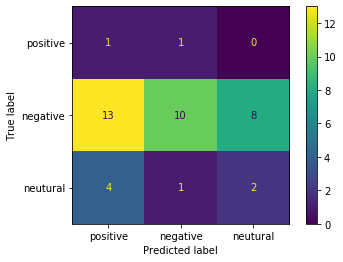

In [0]:
# Evaluate the Classifer
conf_matrix_nb, model_metrics_nb = evaluate(y_predict_nb, y_test3, metrics, 'Complement Naive Bayes classifier')
ConfusionMatrixDisplay(conf_matrix_nb, sorted_sentiments).plot(values_format='.4g')
print(model_metrics_nb)

## 2. Best Tuned Classifier: RBF SVM




In [0]:
# Initiate classifier
svc = SVC(kernel='rbf')

# Train the classier
model_svc = svc.fit(X_train3, y_train3)

# Predict the classifier
y_predict_svc = model_svc.predict(X_test3)

{'Accuracy': 77.5, 'Kappa': 0.0}


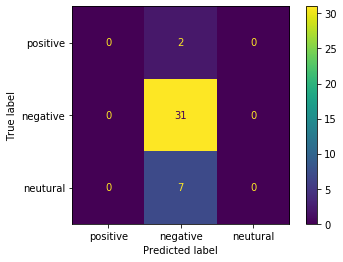

In [0]:
# Evaluate the Classifer
conf_matrix_svc, model_metrics_svc = evaluate(y_predict_svc, y_test3, metrics, 'Complement Naive Bayes classifier')
ConfusionMatrixDisplay(conf_matrix_svc, sorted_sentiments).plot(values_format='.4g')
print(model_metrics_svc)

## 3. Metrics Report
Based on the result summary table in Task 2, I summarized all the metrics based on hyperparameters and feature adjustment in the following table.

|Adjustment|Best Model by Accuracy|Accuracy| Best Model by Kappa|Kappa|
|--------|---------|---------|---------|---------|
|Classier|SVM|69.38|NB|0.14|
|N-grams|Trigram|66.25|Unigram|0.06|
|Stop words|Without|68.12|With|0.2|
|Word size|850|66.88|650|0.17|
|Part-of-speech|Without|66.25|Without|0.022|
|SVM|RBF SVM|67.50|Linear SVM|0.10|
|Naïve Bayes classifier||32.5||0.037|
|RBF SVM||77.5||0|

Among these eight adjustments, four of them are based on hyperparameters; while the rest are based on different features. Among the hyperparameter tuning adjustment, according to accuracy, the RBF SVM is of best performance; according to kappa, Complement Naïve Bayes works best. 

# Extra Credit

For up to 3 points of extra credit:
   - Perform five of the optimizations above instead of three.

For up to 3 points of extra credit:
   - Re-run the same set of code above but on `labels_B` instead of `labels_A`. Choose a new set of optimized hyperparameters and features based on these results. How do the chosen models differ, and are the model quality metrics different between the two columns in a statistically significant way? 

The extra optimizations have been performed in the previous task. According to the metrics summary, I need to train the model based on `labels_B` using the model of RBF SVM and Complement Naïve Bayes.

## 4.1 Dataset Construction

In [0]:
# Train dataset
train_B = train_df_bow.copy()
train_B["sentiment"] = train_df['labels_B'].values

# Test dataset
test_B = test_df_bow.copy()
test_B["sentiment"] = test_df['labels_B'].values

In [0]:
# Define train and test dataset
X_trainB = train_B.iloc[:,:-1]
y_trainB = train_B['sentiment']
X_testB = test_B.iloc[:,:-1]
y_testB = test_B['sentiment']

## 4.2 RBF SVM


### 4.2.1 Training Model and Performance Evaluation

In [0]:
# Train the classier
model_svmB = svc.fit(X_trainB, y_trainB)

# Predict the classifier
y_predict_svmB = model_svmB.predict(X_testB)

{'Accuracy': 65.0, 'Kappa': 0.0}


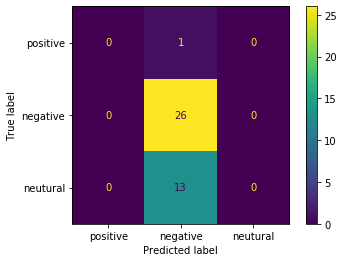

In [0]:
# Evaluate the Classifer
conf_matrix_svm, model_metrics_svm = evaluate(y_predict_svmB, y_testB, metrics, 'Radial Basis Function (RBF) kernel SVM')
ConfusionMatrixDisplay(conf_matrix_svm, sorted_sentiments).plot(values_format='.4g')
print(model_metrics_svm)

### 4.2.2 Performance Comparison
Since the kappa among the two models are all 0, I will further compare the accuracy of the two models.

In [0]:
t_svm, p_svm = stats.ttest_ind(y_predict_svmB==y_test3 ,y_predict_svmB==y_testB)
print(f'The p values among the outcomes of the two classifers is {p_svm:.2f}.')

The p values among the outcomes of the two classifers is 0.22.


Since the p value is larger than 0.1, these two classifers based on different label reviewers are not significantly different using RBF SVM as the classifier.

## 4.3 Complement Naive Bayes


### 4.3.1 Training Model and Performance Evaluation

In [0]:
# Train the classier
model_nbB = nb.fit(X_trainB, y_trainB)

# Predict the classifier
y_predict_nbB = model_nbB.predict(X_testB)

{'Accuracy': 37.5, 'Kappa': -0.09051254089422023}


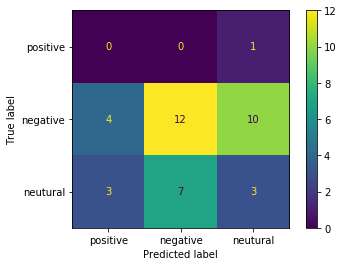

In [0]:
# Evaluate the Classifer
conf_matrix_nb, model_metrics_nb = evaluate(y_predict_nbB, y_testB, metrics, 'Complement Naive Bayes classifier')
ConfusionMatrixDisplay(conf_matrix_nb, sorted_sentiments).plot(values_format='.4g')
print(model_metrics_nb)

### 4.3.2 Performance Comparison

In [0]:
t_nb, p_nb = stats.ttest_ind(y_predict_nbB==y_test3 ,y_predict_nbB==y_testB)
print(f'The p values among the outcomes of the two classifers is {p_nb:.2f}.')

The p values among the outcomes of the two classifers is 0.37.


Since the p value is larger than 0.1, these two classifers based on different label reviewers are not significantly different using Complement Naive Bayes classifier.


# Scoring Rubric
![](https://drive.google.com/uc?export=view&id=1JqI8Tfmi3YrnjVdDxjwNu1ZOuOOgQCuI)

![](https://drive.google.com/uc?export=view&id=1VfVuKGmNBu6oJgXBTX4YB6Lxe_0t9cWN)